**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
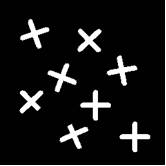
art8lab1.png: 
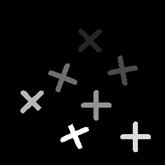
art8lab2.png: 
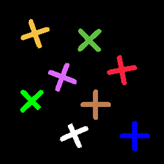
		

Total de Objetos:  8


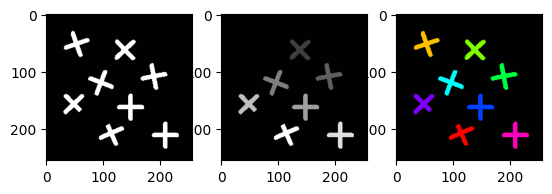

In [1]:
# code here
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy #precisa pq matriz são passadas por referencia e na hora executar a coloração está afetando a imagem original

image = cv2.imread('art8.png')
plt.subplot(1, 3, 1)
plt.imshow(image)

def instatiateVisitedMatrix():
  VisitedMatrix = []

  for x in range(image.shape[0]):
    line = []
    for y in range(image.shape[1]):
      line.append(False)
    VisitedMatrix.append(line)
  return VisitedMatrix

def addNeighboursToWaitList(VisitedMatrix, x, y):
  listOfAdjacents = []
  for i in range(-1, 2):
    for j in range(-1, 2):
      if not VisitedMatrix[x+i][y+j] and all(image[x+i, y+j] == np.array([255,255,255])):
       listOfAdjacents.append((x+i, y+j))
       VisitedMatrix[x+i][y+j] = True
  return listOfAdjacents

def BFS(VisitedMatrix, x, y, objectsCount):
  queue = [(x, y)]
  VisitedMatrix[x][y] = True
  queue.append((x,y))
  while queue:
    cx, cy = queue.pop(0)
    queue.extend(addNeighboursToWaitList(VisitedMatrix, cx, cy))

def findObjects(image):
  VisitedMatrix = instatiateVisitedMatrix()
  objectCount = 0
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if not all(image[i, j] == np.array([255,255,255])):
        VisitedMatrix[i][j] = True
      elif VisitedMatrix[i][j] == False:
        objectCount += 1
        BFS(VisitedMatrix, i, j, objectCount)
  return objectCount

def colorBFS(VisitedMatrix, x, y, objectsCount, image, color):
  queue = [(x, y)]
  VisitedMatrix[x][y] = True
  while queue:
    cx, cy = queue.pop(0)
    image[cx,cy] = np.array(color)
    queue.extend(addNeighboursToWaitList(VisitedMatrix, cx, cy))
  return image

def colorObjects(totalObjects, pattern = 'gray'):
  VisitedMatrix = instatiateVisitedMatrix()
  newImage = copy.deepcopy(image)

  objectCount = 0
  for i in range(newImage.shape[0]):
    for j in range(newImage.shape[1]):
      if not all(newImage[i, j] == np.array([255,255,255])):
        VisitedMatrix[i][j] = True
      elif VisitedMatrix[i][j] == False:
        objectCount += 1
        newColor = defineColors(totalObjects, objectCount, pattern)
        colorBFS(VisitedMatrix, i, j, objectCount, newImage, newColor)
        newImage = colorBFS(VisitedMatrix, i, j, objectCount, newImage,newColor)
  return newImage

def defineColors(totalObjects, objectCount, pattern = 'gray'):
  if pattern == 'gray':
    newColor = 0
    if objectCount != 1:
      newColor = 255 * (objectCount/totalObjects)
    return (newColor, newColor, newColor)

  elif pattern == 'rgb':
    totalColors = 1530
    colorValue = totalColors * objectCount/totalObjects

    if colorValue <= 255: #(255, 0, 0) -> (255, 255, 0)
      return [255, colorValue, 0]
    else:
      colorValue -= 255
    if colorValue <= 255: # (255, 255, 0) -> (0, 255, 0)
      return [255-colorValue, 255, 0]
    else:
      colorValue -= 255
    if colorValue <= 255: # (0, 255, 0) -> (0, 255, 255)
      return [0, 255, colorValue]
    else:
      colorValue -= 255
    if colorValue <= 255: # (0, 255, 255) -> (0, 0, 255)
      return [0, 255 - colorValue, 255]
    else:
      colorValue -= 255
    if colorValue <= 255: # (0, 0, 255) -> (255, 0, 255)
      return [colorValue, 0, 255]
    else:
      colorValue -= 255
    if colorValue <= 255: # (255, 0, 255) -> (255, 0, 0)
      return [255, 0, 255-colorValue]
    else:
      colorValue -= 255
    # print("CAIU", totalObjects, objectCount)
    #só pra tirar o peso da consciencia coloquei esse ultimo retonro
    return None

totalObjectCount = findObjects(image)
print("Total de Objetos: ", totalObjectCount)
plt.subplot(1, 3, 2)
plt.imshow(colorObjects(totalObjectCount))
plt.subplot(1, 3, 3)
plt.imshow(colorObjects(totalObjectCount, 'rgb'))


2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 167 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

212


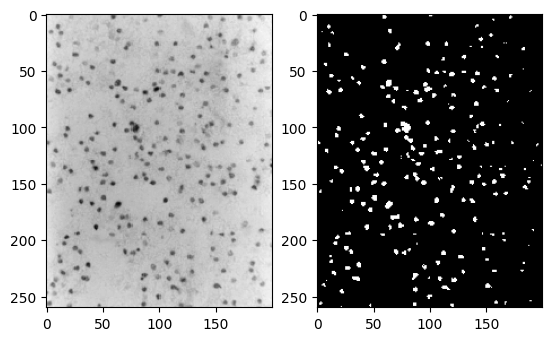

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy

# OBS.: na primeira imagem não lemos em grayscale então tivemos que usar os 3 canais,
# tive que refazer a função pq não tava contando os objetos direito
# Fiz a função funcionar para grayscale

def instatiateVisitedMatrix(img):
  VisitedMatrix = []
  for x in range(img.shape[0]):
    line = []
    for y in range(img.shape[1]):
      line.append(False)
    VisitedMatrix.append(line)
  return VisitedMatrix

def findObjectsGrayScale(image):
  VisitedMatrix = instatiateVisitedMatrix(image)
  objectCount = 0
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if image[i, j] != 1:
        VisitedMatrix[i][j] = True
      elif VisitedMatrix[i][j] == False:
        objectCount += 1
        BFSGrayScale(image, VisitedMatrix, i, j)
  return objectCount

# Mesma coisa para todas as funções que vao ser repetidas a baixo:
def addNeighboursToWaitListGrayScale(image, VisitedMatrix, x, y):
  listOfAdjacents = []
  h, w = image.shape
  for i in range(-1, 2):
    for j in range(-1, 2):
      if i == 0 and j == 0:
        continue
      nx, ny = x+i, y+j
      if 0 <= nx < h and 0 <= ny < w:
        if not VisitedMatrix[nx][ny] and image[nx, ny] == 1:
          listOfAdjacents.append((nx, ny))
          VisitedMatrix[nx][ny] = True
  return listOfAdjacents

def BFSGrayScale(image, VisitedMatrix, x, y, objectsCount=None):
  queue = [(x, y)]
  VisitedMatrix[x][y] = True
  while queue:
    cx, cy = queue.pop(0)
    queue.extend(addNeighboursToWaitListGrayScale(image, VisitedMatrix, cx, cy))

image = cv2.imread('clc3.png', cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

newImage = copy.deepcopy(image)

for i in range(newImage.shape[0]):
  for j in range(newImage.shape[1]):
    if newImage[i][j] >= 167:
      newImage[i][j] = 0
    else:
      newImage[i][j] = 1

print(findObjectsGrayScale(newImage))

plt.subplot(1, 2, 2)
plt.imshow(newImage, cmap='gray')

3. Calcule a distância média entre os objetos da imagem anterior. Mostre um histograma com as distâncias e o valor médio.

Media: 112.93


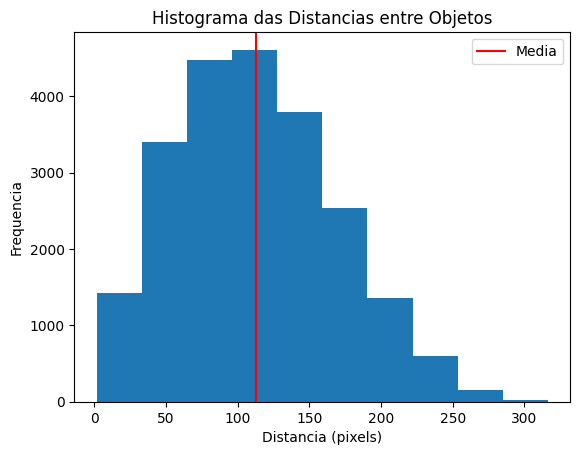

In [16]:
import cv2
import matplotlib.pyplot as plt
import math


image = cv2.imread('clc3.png', cv2.IMREAD_GRAYSCALE)
linhas, colunas = image.shape

visited = [[False for _ in range(colunas)] for _ in range(linhas)]
centroids = []

for lin in range(linhas):
  for col in range(colunas):
    #threshold
    if image[lin, col] < 167 and not visited[lin][col]:
        queue = [(lin, col)]
        visited[lin][col] = True

        #centro
        sum_lin = 0
        sum_col = 0
        count_pixels = 0
        head = 0

        while head < len(queue):
            curr_lin, curr_col = queue[head]
            head += 1

            sum_lin += curr_lin
            sum_col += curr_col
            count_pixels += 1

            #vizinhos 8
            neighbors = [(-1, -1), (-1, 0), (-1, 1),
                          (0, -1),           (0, 1),
                          (1, -1),  (1, 0),  (1, 1)]

            for dlin, dcol in neighbors:
                nlin, ncol = curr_lin + dlin, curr_col + dcol

                # verifica limites da imagem
                if 0 <= nlin < linhas and 0 <= ncol < colunas:
                    if not visited[nlin][ncol]:
                        if image[nlin, ncol] < 167:
                            visited[nlin][ncol] = True
                            queue.append((nlin, ncol))


        if count_pixels > 0:
            center_x = sum_lin / count_pixels
            center_y = sum_col / count_pixels
            centroids.append((center_x, center_y))


distances = []
num_objects = len(centroids)

for i in range(num_objects):
    for j in range(i + 1, num_objects):
        p1 = centroids[i]
        p2 = centroids[j]

        # dist euclidiana: sqrt((x2-x1)^2 + (y2-y1)^2)
        dist = math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
        distances.append(dist)

if distances:
  media = sum(distances) / len(distances)
  print(f"Media: {media:.2f}")


  plt.hist(distances)

  plt.axvline(media, color='red', label='Media')
  plt.title("Histograma das Distancias entre Objetos")
  plt.xlabel("Distancia (pixels)")
  plt.ylabel("Frequencia")
  plt.legend()
  plt.show()
else:
  print("Menos de 2 objetos encontrados.")

4. Mostra a Transformada Distância da imagem do exercício 1

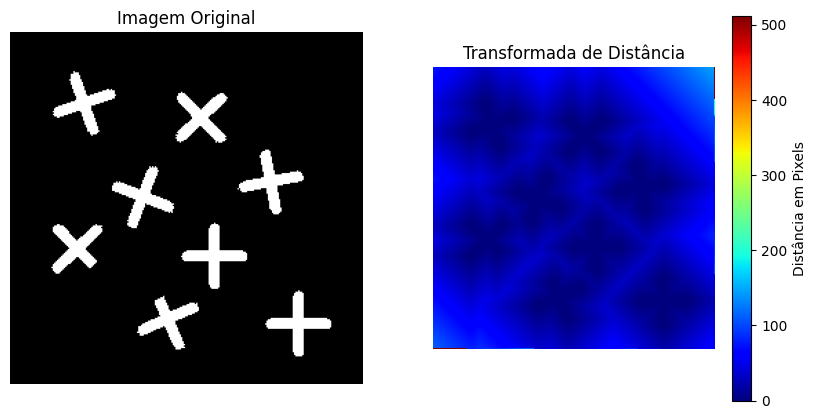

In [5]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('art8.png', cv2.IMREAD_GRAYSCALE)

linhas, colunas = image.shape

infinity = linhas + colunas

    # objeto (< 167), inicializa com Infinito.
    #fundo (>= 167), inicializa com 0 (distância para o fundo é 0).
dist_matrix = []
for l in range(linhas):
        lin_list = []
        for c in range(colunas):
            if image[l, c] < 167: # Objeto
                lin_list.append(infinity)
            else: # Fundo
                lin_list.append(0)
        dist_matrix.append(lin_list)


for l in range(1, linhas):
        for c in range(1, colunas):
            if dist_matrix[l][c] > 0:
                min_neighbor = min(dist_matrix[l-1][c], dist_matrix[l][c-1])
                if min_neighbor + 1 < dist_matrix[l][c]:
                    dist_matrix[l][c] = min_neighbor + 1


for l in range(linhas - 2, -1, -1):
        for c in range(colunas - 2, -1, -1):
            if dist_matrix[l][c] > 0:
                min_neighbor = min(dist_matrix[l+1][c], dist_matrix[l][c+1])
                if min_neighbor + 1 < dist_matrix[l][c]:
                    dist_matrix[l][c] = min_neighbor + 1



plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Imagem Original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(dist_matrix, cmap='jet')
plt.title("Transformada de Distância")
plt.colorbar(label='Distância em Pixels')
plt.axis('off')
plt.show()